In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
linear_data = pd.read_csv("linear_function_data.txt", sep = " ", header = None)
nonlinear_data = pd.read_csv("nonlinear_function_data.txt", sep = " ", header = None)

# 1. Approximate the function in dataset (A) with a linear function

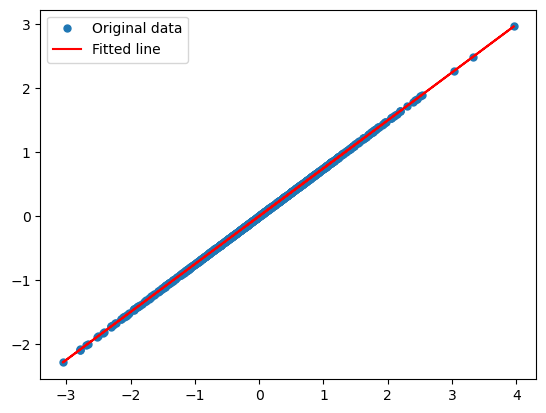

In [3]:
x = np.array([linear_data.values[:,0]]).T
y = linear_data.values[:,1]
# Calculate coefficient A with least-squares minimization
A, _, _, _ = LSM(x, y)

# Plot the dataset and the fitted line
plt.plot(x, y, 'o', label='Original data', markersize=5)
A = A[0]
plt.plot(x, A*x, 'r', label='Fitted line', markersize=1)
plt.legend()
plt.show()

# 2. Approximate the function in dataset (B) with a linear function

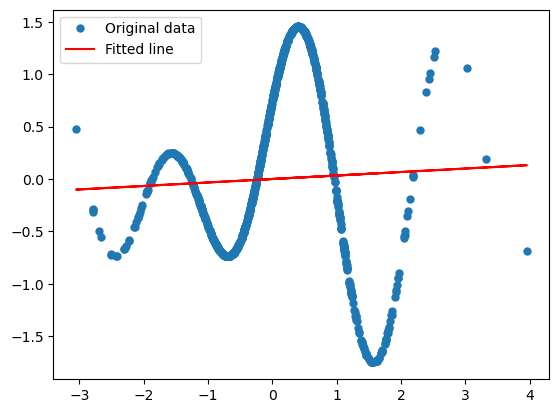

In [4]:
x = np.array([nonlinear_data.values[:,0]]).T
y = nonlinear_data.values[:,1]

A, _, _, _ = LSM(x, y)

# Plot the dataset and the fitted line
plt.plot(x, y, 'o', label='Original data', markersize=5)
A = A[0]
plt.plot(x, A*x, 'r', label='Fitted line', markersize=1)
plt.legend()
plt.show()

# 3. Approximate the function in dataset (B) with a combination of radial functions

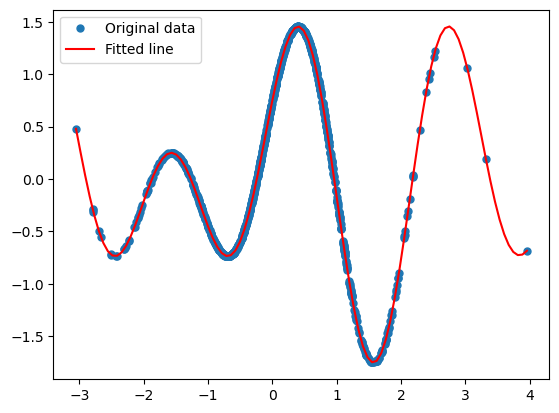

In [5]:
x = nonlinear_data.values[:, 0]
y = nonlinear_data.values[:, 1]

# Define the concatenation of L radial basis functions φ(X)
x_min = np.min(x)
x_max = np.max(x)
L = 100
domain = np.linspace(x_min, x_max, L)
eps = 1
phi = RBF(eps, domain)

# Evaluate X for each radial basis function in φ(X)
x_phi = phi(x[0])
for i in range(1, len(x)):
    x_phi = np.vstack((x_phi, phi(x[i])))

C, _, _, _ = LSM(x_phi, y)

# Plot the dataset and the fitted line
plt.plot(x, y, 'o', label='Original data', markersize=5)
fitting_x = np.linspace(min(x), max(x), 100)
fitting_y = np.array(C @ phi(fitting_x[0]))
for i in range(1, len(fitting_x)):
    fitting_y = np.vstack((fitting_y, C @ phi(fitting_x[i])))
plt.plot(fitting_x, fitting_y, 'r', label='Fitted line', markersize=1)
plt.legend()
plt.show()